# Login_register_analisys_Sprint4 

Log analysis is an important function for monitoring and alerting, security policy compliance, auditing and regulatory compliance, security incident response, and even forensic investigations. By analyzing log data, companies can more easily identify potential threats and other problems, find the root cause, and initiate a rapid response to mitigate risks.

### Level 1

The analyst must ensure that the records consist of a full range of messages and are interpreted according to the context. Registration elements should be standardized, using the same terms or terminology, to avoid confusion and provide cohesion.

As a Data Scientist, you have been provided with access to the Logs where the activity of all visits to the travel agency's website "akumenius.com" is recorded.

### Ex 1
Standardize, identify, and enumerate each of the attributes / variables in the " Web_access_log-akumenius.com " file structure found in the "Data-sources" GitHub repository .

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from datetime import datetime
import urllib.request
import json

In [2]:
#Open the .txt file as a table.
pd.set_option('display.max_columns', None, 'display.max_colwidth', None)
df = pd.read_table('Web_access_log-akumenius.com.txt',names = ["1column"])
df

,1column
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
...,...
261868,"www.akumenius.com 5.255.253.53 - - [02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"" VLOG=-"
261869,"www.akumenius.com 74.86.158.107 - - [02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/)"" VLOG=-"
261870,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"
261871,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-"


- 1º item is the web address where the request started.

- 2º item is the IP address of the client. It is composed by numbers and dots. 

- 3º item is the RFC 1413 identity.

- 4º item is the user ID of the client who made the requiest. 

- 5º item is the date, time and timezone. It is related to the time of the received requiest. Format: DD-Mon-YYYY hh:mm:ss - timezone.

- 6º item is composed by 3 elements: The first is a word in capital letters and it is the signin method used by the client. The second element represents the resource requested by the user, and the third part represents the type of protocol used for make the requiest.

- 7º item represents the status code that is the response server to client. Code:

- Start with 2 = successful response
- Start with 3 = redicrection
- Start with 4,  error from the client 
- Start with 5, error from the server

- 8º item represent the the objetc size delivered to the client. It can be a number, or a dash symbol when nothing is returned.

- 9º item represents the referer. It is the name of an optional HTTP header field that identifies the web page address (ie, URI or IRI) from which the request is made. By checking the referer field, the new website's server can determine where the request originated from.

- 10º represent an identifier that give information about the browser used by the client.

### Ex 2: 

Cleans, preprocesses, structures and transforms (dataframe) the data in the Web Access register.

Now let create the related columns and assign them to the related information:

In [3]:
import re

In [4]:
#divide into columns where there are the followin symbols:
column = df["1column"].apply(lambda column:re.findall("[^\"]*", column))
column.head()

0    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
1    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
2    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
3    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
4    [localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] , , OPTIONS * HTTP/1.0, ,  200 - , , -, ,  , , Apache (internal dummy connection), ,  VLOG=-, ]
Name: 1column, dtype: object

In [5]:
#create new column: WebAddress
df["Host"] = column.map(lambda column:column[0].split(" ")[0])
df.head()

,1column,Host
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost


In [6]:
# \d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3} ip numbers between the dots can go from 0 to 255
#create new column for ip address
df["ip"] = column.map(lambda column:re.search("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}", column[0]).group())
df.head()

,1column,Host,ip
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1


In [7]:
#create time column
df["time"] = column.map(lambda column:re.search("\d{2}:\d{2}:\d{2}", column[0]).group())
df.head()

,1column,Host,ip,time
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10


In [8]:
#create date column
df["date"] = column.map(lambda column:re.search("\d{1,2}/[A-Za-z]{3}/\d{4}", column[0]).group())
df.head()

,1column,Host,ip,time,date
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014


In [9]:
#create timezone column
df["timezone"] = column.map(lambda column:re.search("(\+|\-)\d{4}", column[0]).group())
df.head()

,1column,Host,ip,time,date,timezone
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100


In [10]:
#create column for request line and divide into method, resource requested, and protocol
df["r"] = column.map(lambda column:column[2])
df[["method", "request", "protocol"]] = df["r"].str.split(expand = True)
df = df.drop(["r"], axis = 1)
df.head() 

,1column,Host,ip,time,date,timezone,method,request,protocol
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0


In [11]:
# status, code and size of the object
df["num"] = column.map(lambda column:column[4])
df[["status_code", "size"]] = df["num"].str.split(expand = True)
df = df.drop(["num"], axis = 1)
df.tail()

,1column,Host,ip,time,date,timezone,method,request,protocol,status_code,size
261868,"www.akumenius.com 5.255.253.53 - - [02/Mar/2014:03:05:39 +0100] ""GET / HTTP/1.1"" 200 7528 ""-"" ""Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)"" VLOG=-",www.akumenius.com,5.255.253.53,14:03:05,02/Mar/2014,+0100,GET,/,HTTP/1.1,200,7528
261869,"www.akumenius.com 74.86.158.107 - - [02/Mar/2014:03:09:52 +0100] ""HEAD / HTTP/1.1"" 200 - ""-"" ""Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/)"" VLOG=-",www.akumenius.com,74.86.158.107,14:03:09,02/Mar/2014,+0100,HEAD,/,HTTP/1.1,200,-
261870,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,02/Mar/2014,+0100,OPTIONS,*,HTTP/1.0,200,-
261871,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,02/Mar/2014,+0100,OPTIONS,*,HTTP/1.0,200,-
261872,"localhost 127.0.0.1 - - [02/Mar/2014:03:10:18 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,02/Mar/2014,+0100,OPTIONS,*,HTTP/1.0,200,-


In [12]:
#create column for referer page
df["referer"] = column.map(lambda column:column[6])
df.head()

,1column,Host,ip,time,date,timezone,method,request,protocol,status_code,size,referer
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-


In [13]:
#create browser info column
df["browser_information"] = column.map(lambda column:column[10])
df.head()

,1column,Host,ip,time,date,timezone,method,request,protocol,status_code,size,referer,browser_information
0,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,"localhost 127.0.0.1 - - [23/Feb/2014:03:10:31 +0100] ""OPTIONS * HTTP/1.0"" 200 - ""-"" ""Apache (internal dummy connection)"" VLOG=-",localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)


In [14]:
#delete the first columns whe finished to use
df = df.drop(["1column"], axis = 1)
df

,Host,ip,time,date,timezone,method,request,protocol,status_code,size,referer,browser_information
0,localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
1,localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
2,localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
3,localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
4,localhost,127.0.0.1,14:03:10,23/Feb/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
...,...,...,...,...,...,...,...,...,...,...,...,...
261868,www.akumenius.com,5.255.253.53,14:03:05,02/Mar/2014,+0100,GET,/,HTTP/1.1,200,7528,-,Mozilla/5.0 (compatible; YandexBot/3.0; +http://yandex.com/bots)
261869,www.akumenius.com,74.86.158.107,14:03:09,02/Mar/2014,+0100,HEAD,/,HTTP/1.1,200,-,-,Mozilla/5.0+(compatible; UptimeRobot/2.0; http://www.uptimerobot.com/)
261870,localhost,127.0.0.1,14:03:10,02/Mar/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)
261871,localhost,127.0.0.1,14:03:10,02/Mar/2014,+0100,OPTIONS,*,HTTP/1.0,200,-,-,Apache (internal dummy connection)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261873 entries, 0 to 261872
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Host                 261873 non-null  object
 1   ip                   261873 non-null  object
 2   time                 261873 non-null  object
 3   date                 261873 non-null  object
 4   timezone             261873 non-null  object
 5   method               261873 non-null  object
 6   request              261831 non-null  object
 7   protocol             261829 non-null  object
 8   status_code          261873 non-null  object
 9   size                 261871 non-null  object
 10  referer              261873 non-null  object
 11  browser_information  261873 non-null  object
dtypes: object(12)
memory usage: 24.0+ MB


In [16]:
#save the file
file_name = 'Logs_geoloc.csv'
df.to_csv(file_name)

#### Ex3

Geolocates IP's.

In [17]:
#testing the library
import geocoder 

g = geocoder.ip('80.28.221.123')
g = geocoder.ip('me')
g.latlng
g.city

'Barcelona'

Now let prepare a new optimized database, in order to Geolocalize the IPs of the clinets.

First step we group the repited IPs adresses.

In [18]:
ip_df = df['ip'].value_counts().rename_axis('ip').reset_index(name = 'counts')
ip_df

,ip,counts
0,66.249.76.216,46382
1,80.28.221.123,14725
2,127.0.0.1,13892
3,217.125.71.222,5201
4,66.249.75.148,3558
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


We can apreciate that we have 2921 unic IP's addresses.
And then we cut of the localhos corrispondent IP: 127.0.0.1

In [19]:
ip_df = ip_df.drop(ip_df[ip_df.ip == '127.0.0.1'].index)

ip_df

,ip,counts
0,66.249.76.216,46382
1,80.28.221.123,14725
3,217.125.71.222,5201
4,66.249.75.148,3558
5,162.243.192.191,2927
...,...,...
2916,84.123.150.27,1
2917,217.130.150.116,1
2918,202.46.52.23,1
2919,216.151.130.170,1


Cutting off the LocalHost IP the number of unic IP's adresses decrease to 2920.

Finally I choosed to go ahead with the GeoLite2 library, because free and with easy and clear documentation.

In [20]:
#save the file
file_name = 'Unic_IPs.csv'
ip_df.to_csv(file_name)

In [22]:
#install the geolite2 library
pip install maxminddb-geolite2

Note: you may need to restart the kernel to use updated packages.


Let work with the library and create the data with need: Country, City, latutide and longitude.

In [23]:
import time
from geolite2 import geolite2
geo = geolite2.reader()

In [34]:
df_1 = ip_df.loc[:50,['ip']]

def IP_info_1(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #Faulty IP value
        return np.nan
    try:
        return x['country']['names']['en'] if x is not None else np.nan
    except KeyError:   #Faulty Key value
        return np.nan

s_time = time.time()
# map IP --> country
#apply(fn) applies fn. on all pd.series elements
df_1['country'] = df_1.loc[:,'ip'].apply(IP_info_1)
print(df_1.head(), '\n')
print('Time:',str(time.time()-s_time)+'s \n')

print(type(geo.get('48.151.136.76')))

                ip        country
0    66.249.76.216  United States
1    80.28.221.123          Spain
3   217.125.71.222          Spain
4    66.249.75.148  United States
5  162.243.192.191  United States 

Time: 0.09383392333984375s 

<class 'dict'>


In [39]:
df_1 = ip_df.loc[:50,['ip']]

def IP_info_2(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #Faulty IP value
        return np.nan
    try:
        return x['city']['names']['en'] if x is not None else np.nan
    except KeyError:   #Faulty Key value
        return np.nan

s_time = time.time()
# map IP --> city
#apply(fn) applies fn. on all pd.series elements
df_1['city'] = df_1.loc[:,'ip'].apply(IP_info_2)
print(df_1.head(), '\n')
print('Time:',str(time.time()-s_time)+'s \n')

print(type(geo.get('48.151.136.76')))

                ip               city
0    66.249.76.216      Mountain View
1    80.28.221.123  Torrejón de Ardoz
3   217.125.71.222            Seville
4    66.249.75.148      Mountain View
5  162.243.192.191           New York 

Time: 0.04133105278015137s 

<class 'dict'>


In [42]:
df_1 = ip_df.loc[:50,['ip']]

def IP_info_3(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #Faulty IP value
        return np.nan
    try:
        return x['location']['latitude'] if x is not None else np.nan
    except KeyError:   #Faulty Key value
        return np.nan

s_time = time.time()
# map IP --> latitude
#apply(fn) applies fn. on all pd.series elements
df_1['latitude'] = df_1.loc[:,'ip'].apply(IP_info_3)
print(df_1.head(), '\n')
print('Time:',str(time.time()-s_time)+'s \n')

print(type(geo.get('48.151.136.76')))

                ip  latitude
0    66.249.76.216   37.4192
1    80.28.221.123   40.4554
3   217.125.71.222   37.3824
4    66.249.75.148   37.4192
5  162.243.192.191   40.7308 

Time: 0.04814267158508301s 

<class 'dict'>


In [45]:
df_1 = ip_df.loc[:50,['ip']]

def IP_info_4(ip):
    try:
        x = geo.get(ip)
    except ValueError:   #Faulty IP value
        return np.nan
    try:
        return x['location']['longitude'] if x is not None else np.nan
    except KeyError:   #Faulty Key value
        return np.nan

s_time = time.time()
# map IP --> latitude
#apply(fn) applies fn. on all pd.series elements
df_1['longitude'] = df_1.loc[:,'ip'].apply(IP_info_4)
print(df_1.head(), '\n')
print('Time:',str(time.time()-s_time)+'s \n')

print(type(geo.get('48.151.136.76')))

                ip  longitude
0    66.249.76.216  -122.0574
1    80.28.221.123    -3.4697
3   217.125.71.222    -5.9761
4    66.249.75.148  -122.0574
5  162.243.192.191   -73.9975 

Time: 0.02757406234741211s 

<class 'dict'>


Let add a columm for each data we find out related to the IP's adesses:

In [47]:
ip_df['country'] = ip_df['ip'].apply(IP_info_1)
ip_df['city'] = ip_df['ip'].apply(IP_info_2)
ip_df['latitude'] = ip_df['ip'].apply(IP_info_3)
ip_df['longitude'] = ip_df['ip'].apply(IP_info_4)
ip_df

,ip,counts,country,city,latitude,longitude
0,66.249.76.216,46382,United States,Mountain View,37.4192,-122.0574
1,80.28.221.123,14725,Spain,Torrejón de Ardoz,40.4554,-3.4697
3,217.125.71.222,5201,Spain,Seville,37.3824,-5.9761
4,66.249.75.148,3558,United States,Mountain View,37.4192,-122.0574
5,162.243.192.191,2927,United States,New York,40.7308,-73.9975
...,...,...,...,...,...,...
2916,84.123.150.27,1,Spain,Gandia,38.9667,-0.1833
2917,217.130.150.116,1,Spain,NaN,40.4172,-3.6840
2918,202.46.52.23,1,China,Shenzhen,22.5333,114.1333
2919,216.151.130.170,1,United States,San Jose,37.4250,-121.9460


#### Ex 3.

Show me your creativity, Surprise me go one step further with the above analysis.

Let get a vosualization based on the dataframe vith localization ithems.

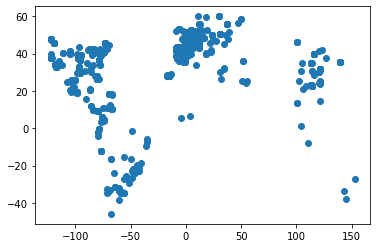

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x=ip_df['longitude'], y=ip_df['latitude'])
plt.show()

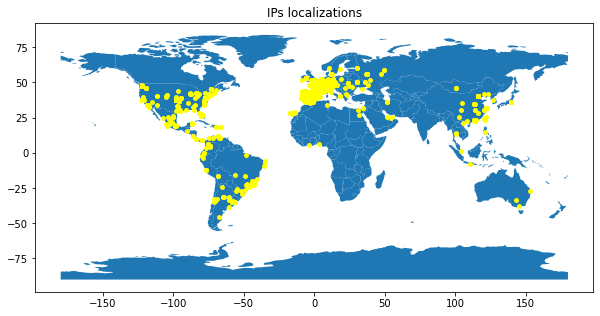

In [59]:
# build the same plot with a map on the backgroud.

from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(ip_df['longitude'], ip_df['latitude'])]
gdf = GeoDataFrame(ip_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='yellow', markersize=15).set(title='IPs localizations');



In [ ]:
Biography:
    
Plot: https://stackoverflow.com/questions/53233228/plot-latitude-longitude-from-csv-in-python-3-6
Geolite2: https://stackoverflow.com/questions/10339351/how-can-i-geolocate-a-bunch-of-ip-addresses-with-python/57006918#57006918
